[![](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/code/pedro2318/pmr3508-2018-66f39f7a58-tarefa4)


EP4- PMR3508-2018-66f39f7a58 Adult+

FOI IMPORTADO INICIALMENTE AS BIBLIOTECAS QUE SE USARIAM E O ARQUIVO PARA TREINO DO CLASSIFICADOR.

In [1]:
import numpy as np
import pandas as pd
import sklearn

raw = pd.read_csv("../input/train_data.csv",
        names= None,
        engine='python',
        na_values = '?')

In [2]:
from sklearn import preprocessing
clean = raw.dropna()
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 16 columns):
Id                30161 non-null int64
age               30161 non-null int64
workclass         30161 non-null object
fnlwgt            30161 non-null int64
education         30161 non-null object
education.num     30161 non-null int64
marital.status    30161 non-null object
occupation        30161 non-null object
relationship      30161 non-null object
race              30161 non-null object
sex               30161 non-null object
capital.gain      30161 non-null int64
capital.loss      30161 non-null int64
hours.per.week    30161 non-null int64
native.country    30161 non-null object
income            30161 non-null object
dtypes: int64(7), object(9)
memory usage: 3.9+ MB


In [3]:
obg = raw[['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']]
obg.nunique()

workclass          8
education         16
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    41
income             2
dtype: int64

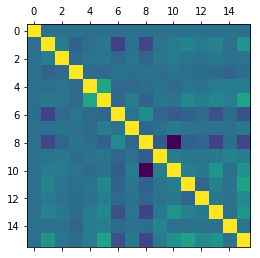

In [4]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
analysis = clean
analysis = analysis.apply(preprocessing.LabelEncoder().fit_transform)
plt.matshow(analysis.corr())

In [5]:
anl0 = analysis.corr().income.sort_values(ascending=True)
anl0

relationship     -0.251009
marital.status   -0.193504
fnlwgt           -0.009987
Id               -0.002498
workclass         0.018103
native.country    0.023273
occupation        0.051551
race              0.071666
education         0.078981
capital.loss      0.162075
sex               0.216715
hours.per.week    0.232328
age               0.242196
education.num     0.335317
capital.gain      0.337331
income            1.000000
Name: income, dtype: float64

In [6]:
anl1 = pd.get_dummies(clean[['relationship','marital.status','capital.loss', 'sex', 'hours.per.week', 'age', 'education.num', 'capital.gain', 'income']])
anl1 = anl1.corr().loc[:,'income_>50K'].sort_values(ascending=True)
anl1

income_<=50K                           -1.000000
marital.status_Never-married           -0.320038
relationship_Own-child                 -0.226196
sex_Female                             -0.216715
relationship_Not-in-family             -0.193236
relationship_Unmarried                 -0.145807
marital.status_Divorced                -0.132038
relationship_Other-relative            -0.084461
marital.status_Separated               -0.074060
marital.status_Widowed                 -0.059100
marital.status_Married-spouse-absent   -0.042565
marital.status_Married-AF-spouse        0.013873
relationship_Wife                       0.125122
capital.loss                            0.150050
sex_Male                                0.216715
capital.gain                            0.221200
hours.per.week                          0.229480
age                                     0.242000
education.num                           0.335317
relationship_Husband                    0.401227
marital.status_Marri

In [7]:
anl1_5 = pd.get_dummies(clean)
anl1_5 = anl1_5.corr().loc[:,'income_>50K'].sort_values(ascending=True).where(lambda x : abs(x) > 0.15).dropna()
anl1_5

income_<=50K                        -1.000000
marital.status_Never-married        -0.320038
relationship_Own-child              -0.226196
sex_Female                          -0.216715
relationship_Not-in-family          -0.193236
occupation_Other-service            -0.165942
capital.loss                         0.150050
education_Prof-school                0.156471
education_Masters                    0.174122
education_Bachelors                  0.178905
occupation_Prof-specialty            0.181452
occupation_Exec-managerial           0.213436
sex_Male                             0.216715
capital.gain                         0.221200
hours.per.week                       0.229480
age                                  0.242000
education.num                        0.335317
relationship_Husband                 0.401227
marital.status_Married-civ-spouse    0.445409
income_>50K                          1.000000
Name: income_>50K, dtype: float64

In [8]:
anl2 = clean[['occupation','income','race']]
anl2 = pd.get_dummies(anl2).drop(columns = 'income_<=50K')
anl2 = anl2.corr().loc[:,'income_>50K'].sort_values(ascending=True).where(lambda x : abs(x) > 0.088).dropna()
anl2

occupation_Other-service       -0.165942
occupation_Adm-clerical        -0.099811
occupation_Handlers-cleaners   -0.093841
race_Black                     -0.088338
occupation_Prof-specialty       0.181452
occupation_Exec-managerial      0.213436
income_>50K                     1.000000
Name: income_>50K, dtype: float64

In [9]:
train_clean = pd.get_dummies(clean)
index = anl1.where(lambda x : abs(x) > 0.07).dropna().index[1:-1].append(anl2.index[:-1])

In [10]:
test_raw = pd.read_csv("../input/test_data.csv",
        names= None,
        engine='python')

In [11]:
X_train = train_clean[index].drop(columns='sex_Female')
Y_train = train_clean.loc[:,'income_>50K']

In [12]:
test_clean = pd.get_dummies(test_raw)
test_clean = test_clean.dropna()
X_test = test_clean[index].drop(columns='sex_Female')

In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 0 to 16279
Data columns (total 22 columns):
marital.status_Never-married         16280 non-null uint8
relationship_Own-child               16280 non-null uint8
relationship_Not-in-family           16280 non-null uint8
relationship_Unmarried               16280 non-null uint8
marital.status_Divorced              16280 non-null uint8
relationship_Other-relative          16280 non-null uint8
marital.status_Separated             16280 non-null uint8
relationship_Wife                    16280 non-null uint8
capital.loss                         16280 non-null int64
sex_Male                             16280 non-null uint8
capital.gain                         16280 non-null int64
hours.per.week                       16280 non-null int64
age                                  16280 non-null int64
education.num                        16280 non-null int64
relationship_Husband                 16280 non-null uint8
marital.status_Marrie

1. KNN (K- Nearest Neighbors)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,Y_train)
model.score(X_train,Y_train)


0.8781539073638142

In [15]:
Y_test_1 = model.predict(X_test)


In [16]:
Y_test_1_copy = Y_test_1
Y_test_1_copy = Y_test_1_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_1_copy)):
    if Y_test_1_copy[output] == 0:
        Y_test_1_copy[output] = '<=50K'
    else:
        Y_test_1_copy[output] = '>50K'
    answer.append([output,Y_test_1_copy[output]])
result1 = np.vstack((test_raw["Id"],Y_test_1_copy)).T
result1

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

2. Regressão Linear

In [17]:
from sklearn import linear_model

linear = linear_model.LinearRegression()

linear.fit(X_train,Y_train)

linear.score(X_train,Y_train)



0.35294487737398417

In [18]:
Y_test_2 = linear.predict(X_test)

In [19]:
Y_test_2_copy = Y_test_2
Y_test_2_copy = Y_test_2_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_2_copy)):
    if Y_test_2_copy[output] == 0:
        Y_test_2_copy[output] = '<=50K'
    else:
        Y_test_2_copy[output] = '>50K'
    answer.append([output,Y_test_2_copy[output]])
result2 = np.vstack((test_raw["Id"],Y_test_2_copy)).T
result2

array([['0', '>50K'],
       ['1', '>50K'],
       ['2', '>50K'],
       ...,
       ['16277', '>50K'],
       ['16278', '>50K'],
       ['16279', '>50K']], dtype='<U21')

3. Regressão Logística

In [20]:
from sklearn.linear_model import LogisticRegression

logmodel = model = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,Y_train)
logmodel.score(X_train,Y_train)



0.8431086502436922

In [21]:
Y_test_3= logmodel.predict(X_test)

In [22]:
Y_test_3_copy = Y_test_3
Y_test_3_copy = Y_test_3_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_3_copy)):
    if Y_test_3_copy[output] == 0:
        Y_test_3_copy[output] = '<=50K'
    else:
        Y_test_3_copy[output] = '>50K'
    answer.append([output,Y_test_3_copy[output]])
result3 = np.vstack((test_raw["Id"],Y_test_3_copy)).T
result3

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

4. Árvore de Decisão

In [23]:
from sklearn import tree

treemodel = tree.DecisionTreeClassifier(criterion='gini') 
treemodel.fit(X_train,Y_train)
treemodel.score(X_train,Y_train)


0.9450946586651636

In [24]:
Y_test_4= model.predict(X_test)

In [25]:
Y_test_4_copy = Y_test_4
Y_test_4_copy = Y_test_4_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_4_copy)):
    if Y_test_4_copy[output] == 0:
        Y_test_4_copy[output] = '<=50K'
    else:
        Y_test_4_copy[output] = '>50K'
    answer.append([output,Y_test_4_copy[output]])
result4 = np.vstack((test_raw["Id"],Y_test_4_copy)).T
result4

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

5. VMS (Máquina de Vetor de Suporte)

In [26]:
from sklearn.svm import SVC

svmmodel = SVC(gamma='auto') 
svmmodel.fit(X_train,Y_train)
svmmodel.score(X_train,Y_train)


0.8711249627001757

In [27]:
Y_test_5= svmmodel.predict(X_test)

In [28]:
Y_test_5_copy = Y_test_5
Y_test_5_copy = Y_test_5_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_5_copy)):
    if Y_test_5_copy[output] == 0:
        Y_test_5_copy[output] = '<=50K'
    else:
        Y_test_5_copy[output] = '>50K'
    answer.append([output,Y_test_5_copy[output]])
result5 = np.vstack((test_raw["Id"],Y_test_5_copy)).T
result5

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

6. Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB() 
NBmodel.fit(X_train,Y_train)
NBmodel.score(X_train,Y_train)


0.7923145784290971

In [30]:
Y_test_6= NBmodel.predict(X_test)

In [31]:
Y_test_6_copy = Y_test_6
Y_test_6_copy = Y_test_6_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_6_copy)):
    if Y_test_6_copy[output] == 0:
        Y_test_6_copy[output] = '<=50K'
    else:
        Y_test_6_copy[output] = '>50K'
    answer.append([output,Y_test_6_copy[output]])
result6 = np.vstack((test_raw["Id"],Y_test_6_copy)).T
result6

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

7. K-Means

In [32]:
from sklearn.cluster import KMeans

KMmodel = KMeans(n_clusters=2, random_state=0)
KMmodel.fit(X_train,Y_train)
KMmodel.score(X_train,Y_train)



-204423665576.01273

In [33]:
Y_test_7= KMmodel.predict(X_test)

In [34]:
Y_test_7_copy = Y_test_7
Y_test_7_copy = Y_test_7_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_7_copy)):
    if Y_test_7_copy[output] == 0:
        Y_test_7_copy[output] = '<=50K'
    else:
        Y_test_7_copy[output] = '>50K'
    answer.append([output,Y_test_7_copy[output]])
result7 = np.vstack((test_raw["Id"],Y_test_7_copy)).T
result7

array([['0', '<=50K'],
       ['1', '<=50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '<=50K']], dtype='<U21')

8. Floresta Aleatória

In [35]:
from sklearn.ensemble import RandomForestClassifier

RFmodel= RandomForestClassifier(n_estimators=100)

RFmodel.fit(X_train,Y_train)
RFmodel.score(X_train,Y_train)


0.9450946586651636

In [36]:
Y_test_8= RFmodel.predict(X_test)

In [37]:
Y_test_8_copy = Y_test_8
Y_test_8_copy = Y_test_8_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_8_copy)):
    if Y_test_8_copy[output] == 0:
        Y_test_8_copy[output] = '<=50K'
    else:
        Y_test_8_copy[output] = '>50K'
    answer.append([output,Y_test_8_copy[output]])
result8 = np.vstack((test_raw["Id"],Y_test_8_copy)).T
result8

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

9. Gradient Boosting & AdaBoost

9.1 GBM

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

GBMmodel= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

GBMmodel.fit(X_train,Y_train)
GBMmodel.score(X_train,Y_train)


0.8587248433407381

In [39]:
Y_test_91= GBMmodel.predict(X_test)

In [40]:
Y_test_91_copy = Y_test_91
Y_test_91_copy = Y_test_91_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_91_copy)):
    if Y_test_91_copy[output] == 0:
        Y_test_91_copy[output] = '<=50K'
    else:
        Y_test_91_copy[output] = '>50K'
    answer.append([output,Y_test_91_copy[output]])
result91 = np.vstack((test_raw["Id"],Y_test_91_copy)).T
result91

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

9.2 AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ADAmodel= AdaBoostClassifier(n_estimators=100)
ADAmodel.fit(X_train,Y_train)
ADAmodel.score(X_train,Y_train)


0.8580285799542455

In [42]:
Y_test_92= GBMmodel.predict(X_test)

In [43]:
Y_test_92_copy = Y_test_92
Y_test_92_copy = Y_test_92_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_92_copy)):
    if Y_test_92_copy[output] == 0:
        Y_test_92_copy[output] = '<=50K'
    else:
        Y_test_92_copy[output] = '>50K'
    answer.append([output,Y_test_92_copy[output]])
result92 = np.vstack((test_raw["Id"],Y_test_92_copy)).T
result92

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '>50K']], dtype='<U21')

10. Redes neurais

In [44]:
from sklearn.neural_network import MLPClassifier
NNmodel = MLPClassifier(solver='lbfgs', random_state=0)

NNmodel.fit(X_train,Y_train)
NNmodel.score(X_train,Y_train)


0.6046218626703359

In [45]:
Y_test_10= NNmodel.predict(X_test)


In [46]:
Y_test_10_copy = Y_test_10
Y_test_10_copy = Y_test_10_copy.tolist()
answer = [["Id","income"]]
for output in range(len(Y_test_10_copy)):
    if Y_test_10_copy[output] == 0:
        Y_test_10_copy[output] = '<=50K'
    else:
        Y_test_10_copy[output] = '>50K'
    answer.append([output,Y_test_10_copy[output]])
result10 = np.vstack((test_raw["Id"],Y_test_10_copy)).T
result10

array([['0', '<=50K'],
       ['1', '>50K'],
       ['2', '<=50K'],
       ...,
       ['16277', '<=50K'],
       ['16278', '<=50K'],
       ['16279', '<=50K']], dtype='<U21')

In [47]:
df1 = pd.DataFrame(result4)
df2 = pd.DataFrame(result7)
df3 = pd.DataFrame(result8)
df4 = pd.DataFrame(result10)

In [48]:
df1.to_csv('result49887402.csv')
df2.to_csv('result79887402.csv')
df3.to_csv('result89887402.csv')
df4.to_csv('result109887402.csv')

Com isso, obtevese os seguintes arquivos csv que consistem dos melores previsões que os classificadores conseguiram.